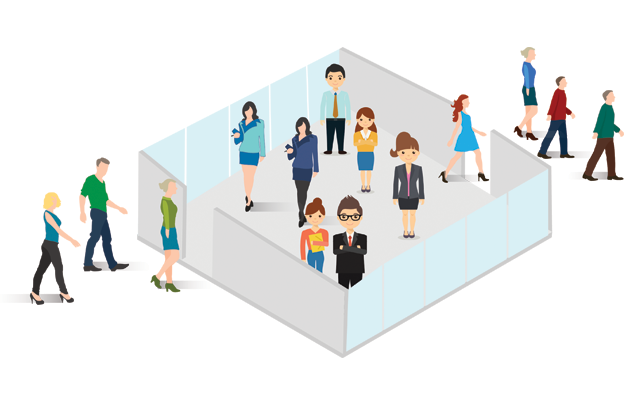

### BUSINESS OVERVIEW
SyriaTel is a telecommunication company that is facing customer churn.Its trying to identify customers with high risk of leaving and how to retain them.Customer churn can be a major source of revenue loss for a telecom company, as it can be costly to acquire new customers to replace those who leave.Overall, we are looking on how to build a classifier whose main goal is to predict customer churn in order help the telecom company to retain valuable customers, reduce revenue loss, and improve customer satisfaction. This can ultimately lead to increased revenue and profitability for the company.

### BUSINESS PROBLEM
SyriaTel a communication company is looking on how to reduce churn rate in their company.Churn prediction is a technique used by companies to identify customers who are most likely to stop using their products or services.By using the dataset provided we are going to be exploring the features provided in order to create a classifier that can predict the likelihood of a customer churning and also the factors that lead to high customer churning.with creation of an effective model Syriatel will be able to identify their weaknesses and how to improve inorder to be able to maintain their customers and reduce customers leaving.

## objectives
The main objectives of our project are
  
   1.our main objective is to identify the features that lead to high customer churning  and to what extent
  
   2.To create predictive,supervised models that can predict churn 
   
   3.To identify ways in which we can reduce customer churning by comparing with features causing it.e.g they can improve their     customer service calls 
   
   4.What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions

##### DATA UNDERSTANDING

In [2]:
#DATA MANIPULATION
import pandas as pd
import numpy as np

#VISUALISATION

import matplotlib.pyplot as plt
import seaborn as sns

# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading the data
data=pd.read_csv('customer churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#finding the columns with numeric variables
numeric_columns = data.select_dtypes(include = np.number).columns
print(numeric_columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [5]:
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())
    print(self.describe())
    print(self.isna)

In [6]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

In [7]:
def data_cleaning(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"missing values :{missing_values}\nduplicated values:{duplicated_values}")
data_cleaning(data)

missing values :0
duplicated values:0


In [8]:
#dropping the phone number columns
data.drop(['phone number'], axis=1,inplace=True)
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


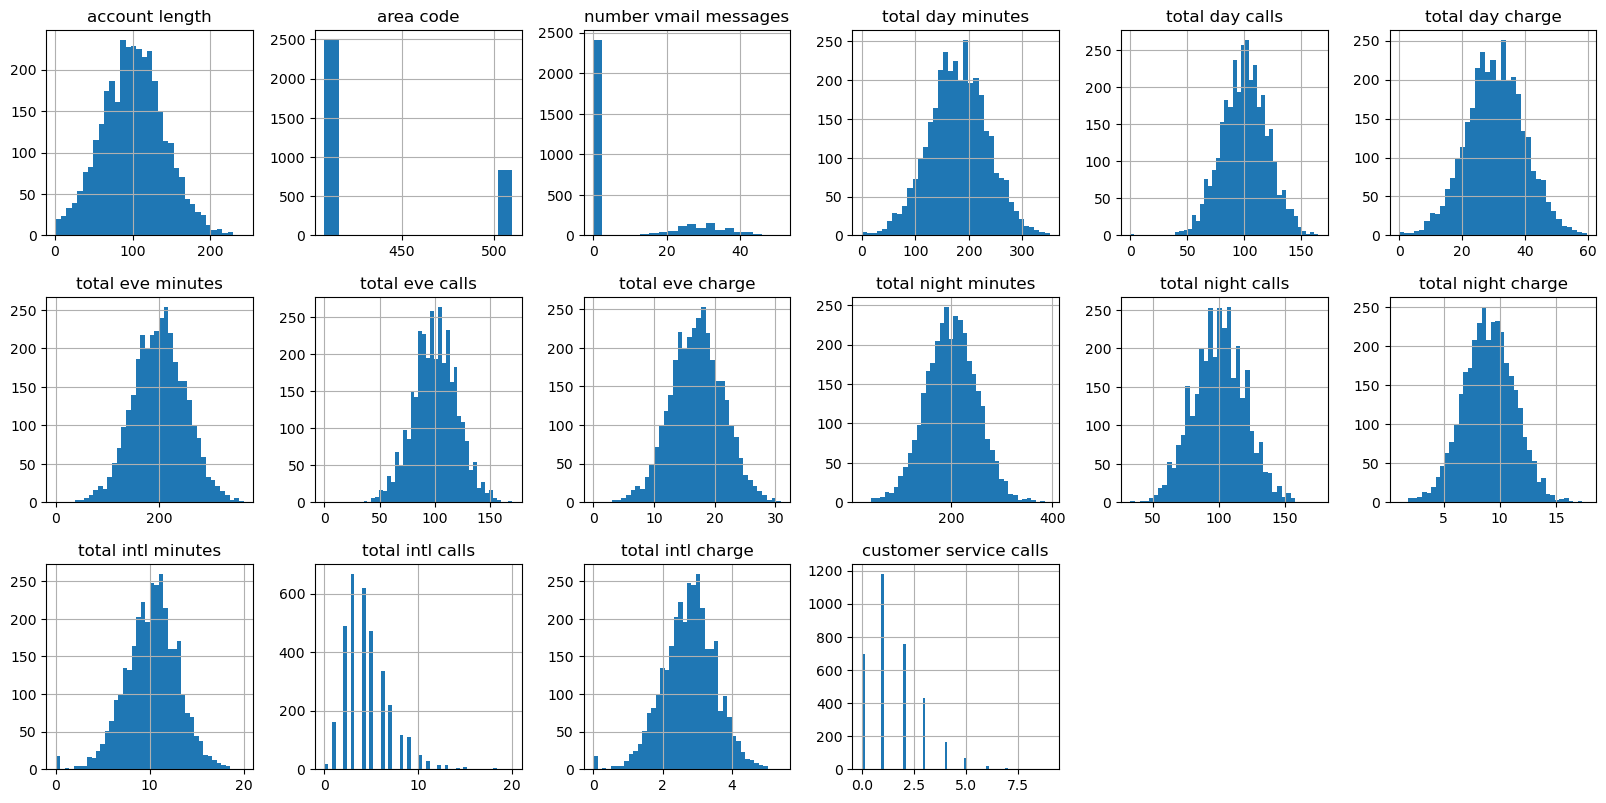

In [9]:
data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()


array([[<Axes: title={'center': 'total day charge'}>]], dtype=object)

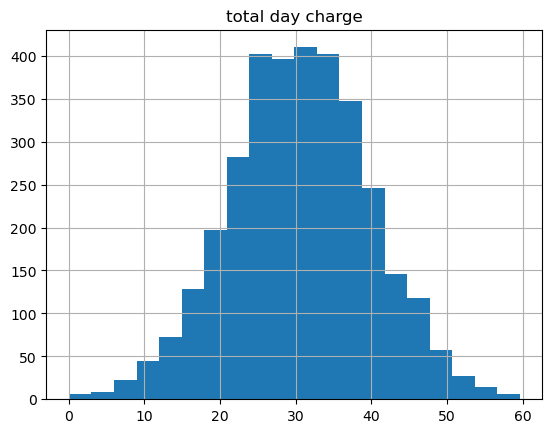

In [13]:
data.hist('total day charge', bins=20)

In [18]:
data.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

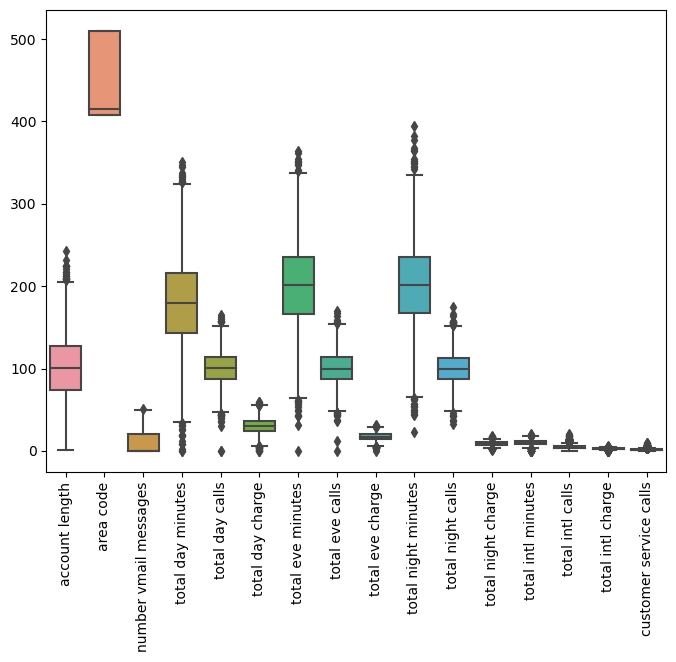

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90)

plt.show()

<BarContainer object of 3333 artists>

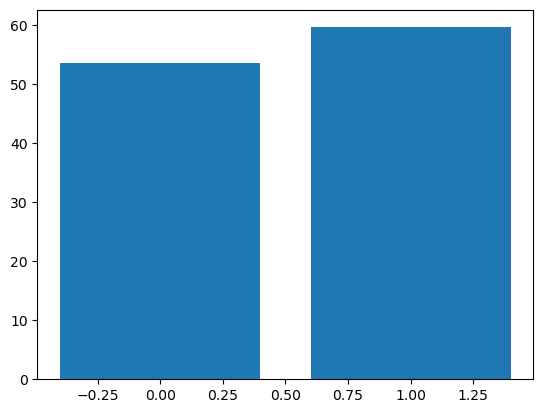

In [20]:
plt.bar(x = data["churn"], height=data["total day charge"])


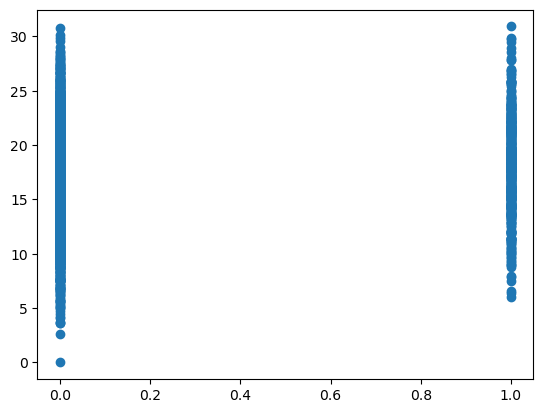

In [21]:
plt.scatter(x = data["churn"], y=data["total eve charge"])


<BarContainer object of 3333 artists>

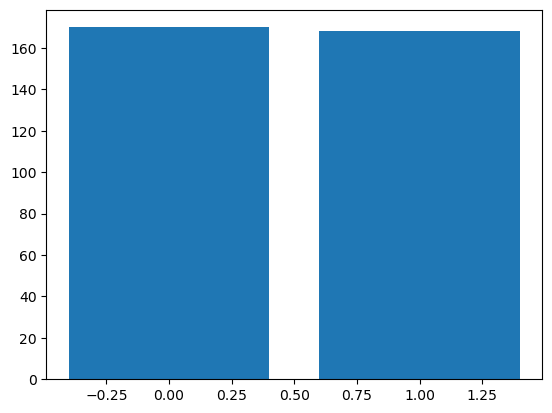

In [22]:
plt.bar(x = data["churn"], height=data["total eve calls"])

 

Next we visualize the churned column in order to understand the pecrcentage of customers who are likely to churn and those likely to  remain

In [23]:
#Transform the voicemail column to binary values for easy coding
#data.voice mail plan.replace(('yes', 'no'), (1, 0), inplace = True)
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

In [24]:
print("Churn Counts")
print(data["churn"].value_counts(normalize=True))
print()
print("Percentages")
print(data["churn"].value_counts(normalize=True))

Churn Counts
False    0.855086
True     0.144914
Name: churn, dtype: float64

Percentages
False    0.855086
True     0.144914
Name: churn, dtype: float64


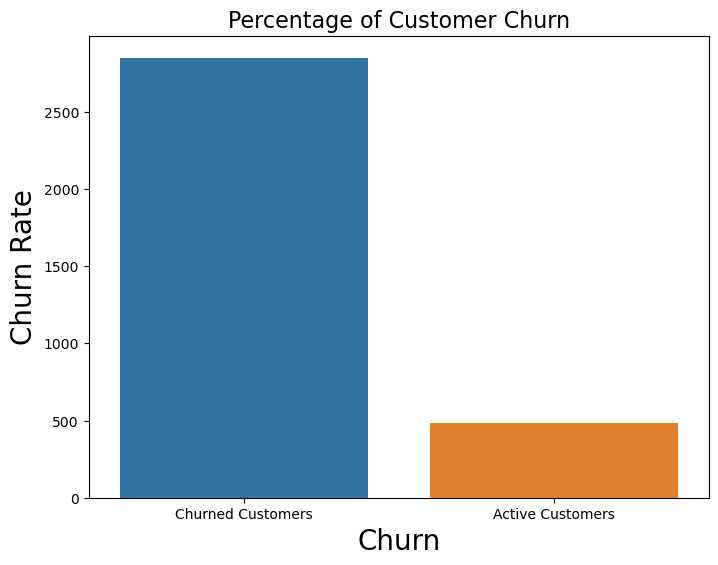

In [25]:
# Percentages of current customers vs customer churn
# churn_per = data["churn"].value_counts(normalize=True)

# Plot of percentages 
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data=data, x='churn',palette="tab10")
plt.title('Percentage of Customer Churn', fontsize = 16)
#ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['Churned Customers', 'Active Customers']);
#plt.tight_layout()   

from  the bar graph above we get to see that the customers who were going to churn were way fewer than those not  willing to churn


#### Churn rate for the average number of customer service calls

In [26]:
cust_serv_calls = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
cust_serv_calls

,churn
customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


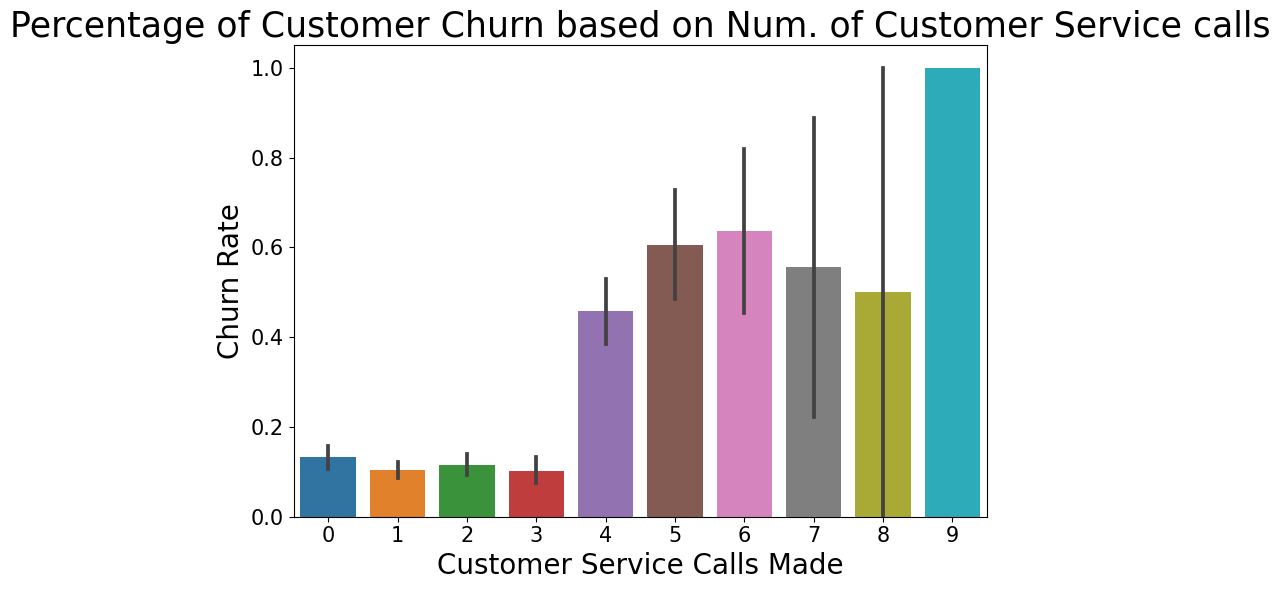

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['customer service calls'], y = 'churn',palette="tab10", ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
#plt.savefig('figures/cust_serv_call_churn.png')

The graph clearly shows a significant increase in the likelihood of customer churn when they make four or more calls to customer service.When the number of service calls reaches a maximum of nine, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers when they are calling customer service by the fourth time.

#### Churn rate for the average number of international calls

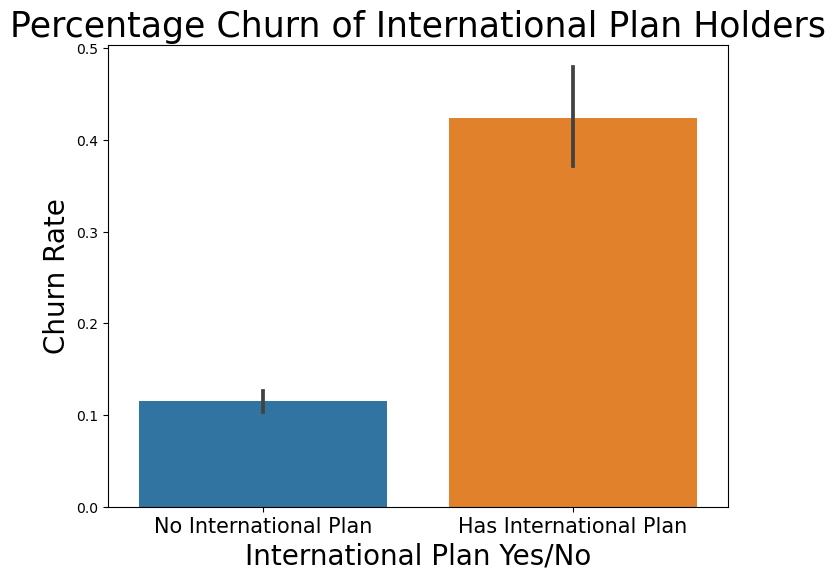

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="tab10", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

from the graph above many of the customers with international plan get to churn.This shows that the phone services are not satisfying them especially when they are out of the country.we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

In [29]:
data.corr().churn

C:\Users\BRAYO\AppData\Local\Temp\ipykernel_2004\3487448096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().churn


account length            0.016541
area code                 0.006174
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

from the correlation matrix we get to see that customer service calls,

C:\Users\BRAYO\AppData\Local\Temp\ipykernel_2004\3729029078.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


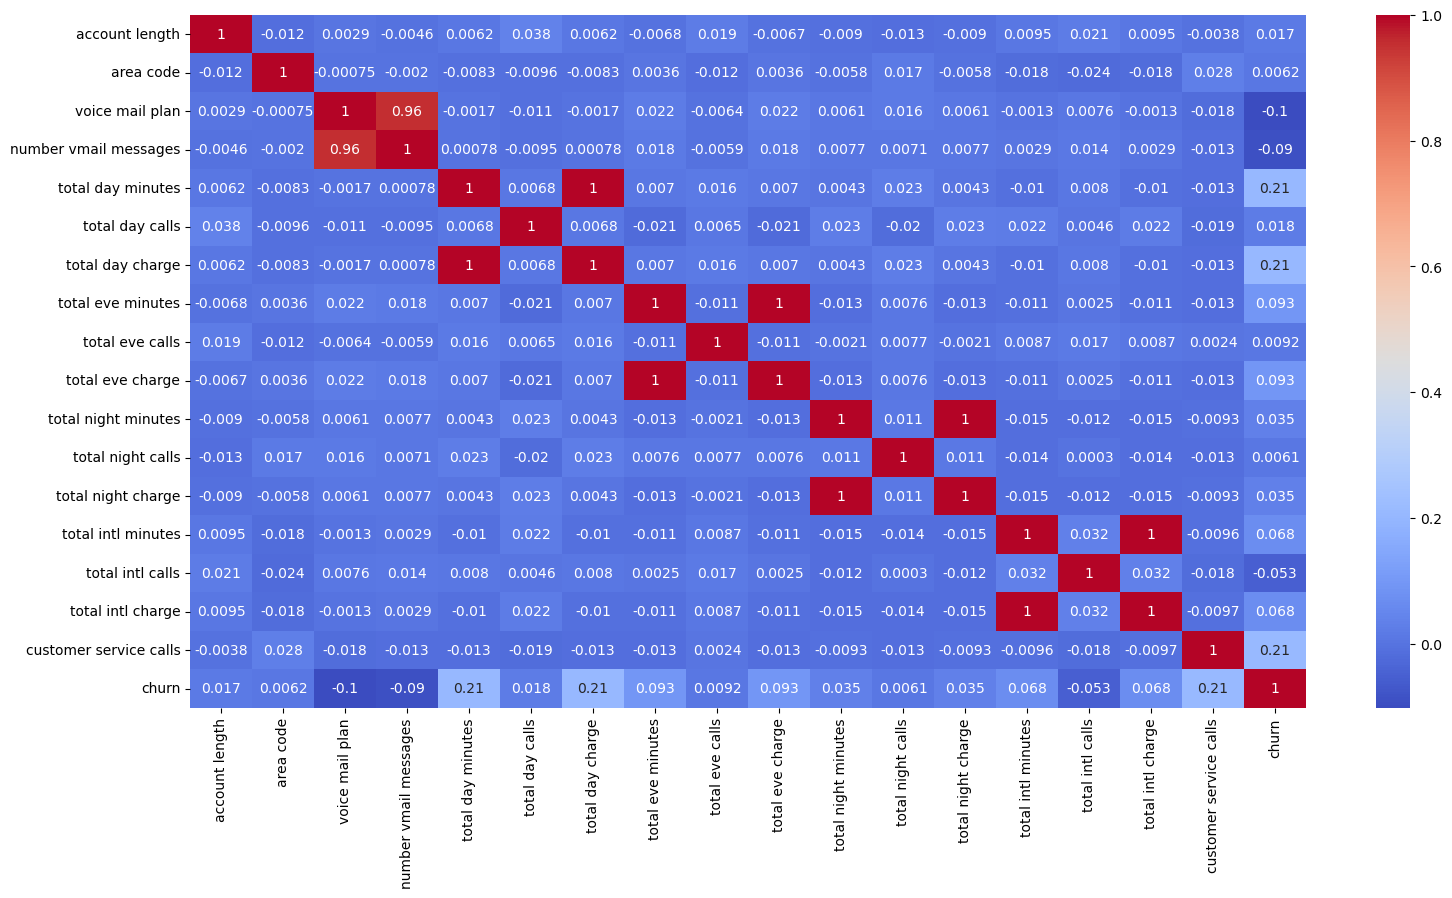

In [30]:
df = pd.DataFrame(data)
plt.figure(figsize=(18, 9))
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm')

# Show the plot
plt.show()

The heatmap above shows that the correlation  between the different features of the dataset.we get to see that most of the features are not highly correlated

### Feature engineering

In [31]:
data = pd.get_dummies(data, columns =["international plan"], drop_first = True)
data

,state,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes
0,KS,128,415,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,OK,75,415,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0
3329,WV,68,415,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0
3330,RI,28,510,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0
3331,CT,184,510,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1


In [32]:
data['churn'] = data['churn'].astype('int8')
data

,state,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes
0,KS,128,415,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,OK,75,415,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,WV,68,415,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,RI,28,510,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,CT,184,510,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1


## MODELLING

In [33]:
X=data.drop(data[['churn', 'state']], axis=1)
y=data['churn']

In [34]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3) 

In [35]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_df_train.head()

,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes
0,-0.511937,1.740454,-0.612192,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319,-0.324289
1,-0.939002,1.740454,-0.612192,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319,-0.324289
2,0.392435,1.740454,1.633475,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378,-0.324289
3,-0.738030,-0.515843,-0.612192,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504,-0.324289
4,0.492921,1.740454,1.633475,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563,-0.324289


In [60]:
base_model = LogisticRegression(random_state=42)

base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)

In [37]:
# calculating the score
base_score=base_model.score(X_test_scaled,y_test)
base_score

0.862

In [38]:
#cross validation
base_model_cv=cross_val_score(base_model,X_train_scaled,y_train)
base_model_cv

array([0.85867238, 0.8608137 , 0.8608137 , 0.84549356, 0.86051502])

In [39]:
base_class=classification_report(y_test,y_pred)
print(base_class)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.21      0.30       143

    accuracy                           0.86      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000



#### check for imbalance

In [102]:
#Dealing with the data imbalance
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)
X_test_resample, y_test_resample = sm.fit_resample(X_test, y_test)

####  Decision trees

In [91]:
tree = DecisionTreeClassifier(random_state=132, max_depth=5)

tree.fit(X_train_resample, y_train_resample)
y_tree_pred = tree.predict(X_test_scaled)
y_pred_train=tree.predict(X_train_resample)

# Scoring on trained data
tree_train_score = tree.score(X_train_resample, y_train_resample)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  0.8113396889111891
Test data score:  0.83


C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [92]:
tree_cv = cross_val_score(tree, X_train_resample, y_train_resample)
tree_cv

array([0.81704261, 0.8055207 , 0.77038896, 0.78670013, 0.81430364])

In [93]:
tree_score=tree.score(X_train_resample,y_train_resample)
tree_score

0.8113396889111891

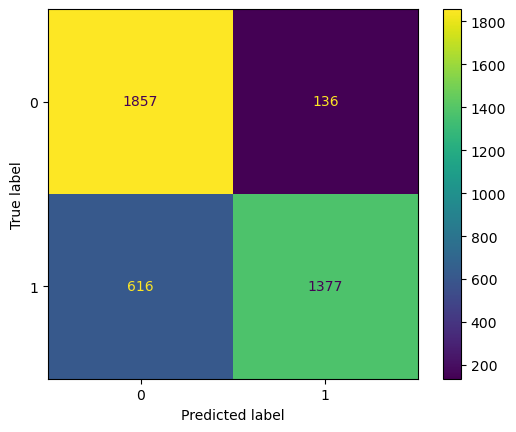

In [94]:
ConfusionMatrixDisplay.from_estimator(tree, X_train_resample, y_train_resample);

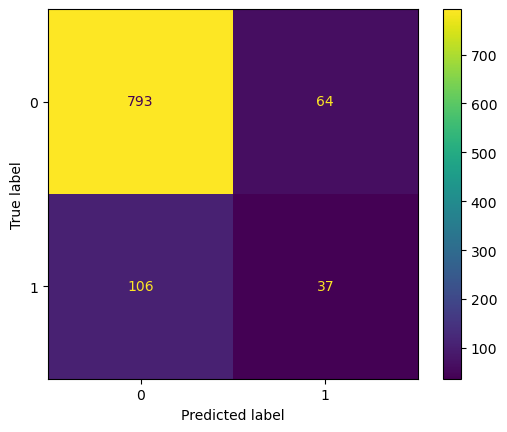

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

In [96]:
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       857
           1       0.37      0.26      0.30       143

    accuracy                           0.83      1000
   macro avg       0.62      0.59      0.60      1000
weighted avg       0.81      0.83      0.82      1000



###  KNN MODELLING 

In [111]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
knn_y_pred=knn.predict(X_test_resample)
knn_pred_train=knn.predict(X_train_resample)
knn_pred_proba=knn.predict_proba(X_test_scaled)
print(knn_pred_proba)

C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 ...
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]]


In [112]:
knn_score=knn.score(X_train_resample,y_train_resample)
knn_score

C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.5296036126442549

In [113]:
knn_cv=cross_val_score(knn,X_train_resample,y_train_resample)
knn_cv

array([0.8245614 , 0.83939774, 0.83939774, 0.82057716, 0.83939774])

C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


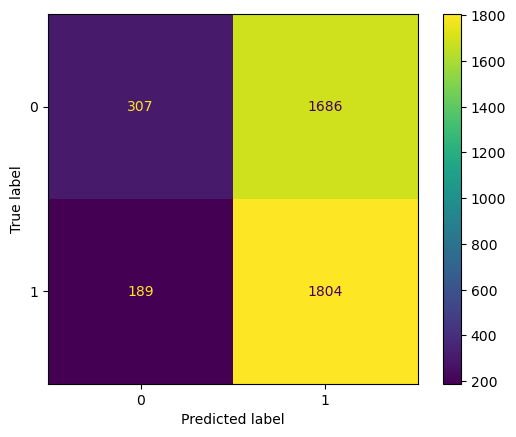

In [114]:
ConfusionMatrixDisplay.from_estimator(knn, X_train_resample, y_train_resample);

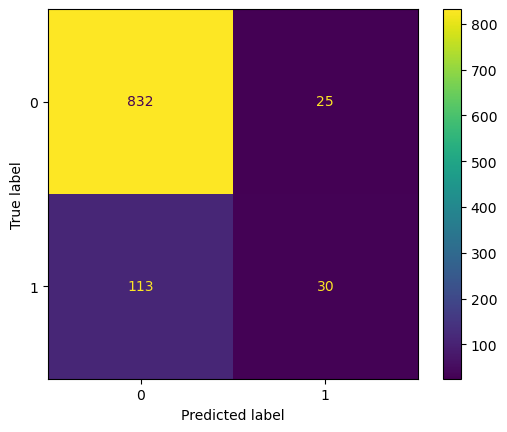

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [116]:
knn_score=classification_report(y_test_resample,knn_y_pred)
print(knn_score)

              precision    recall  f1-score   support

           0       0.66      0.16      0.26       857
           1       0.52      0.91      0.66       857

    accuracy                           0.54      1714
   macro avg       0.59      0.54      0.46      1714
weighted avg       0.59      0.54      0.46      1714



#### Random forest classifier

In [100]:
rf = RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(X_train_resample,y_train_resample)
rf.fit(X_test,y_test)


RandomForestClassifier(n_estimators=5, random_state=42)

In [106]:
y_pred_train=rf.predict(X_train_scaled)
y_rf_pred=rf.predict(X_test_resample)

C:\Users\BRAYO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


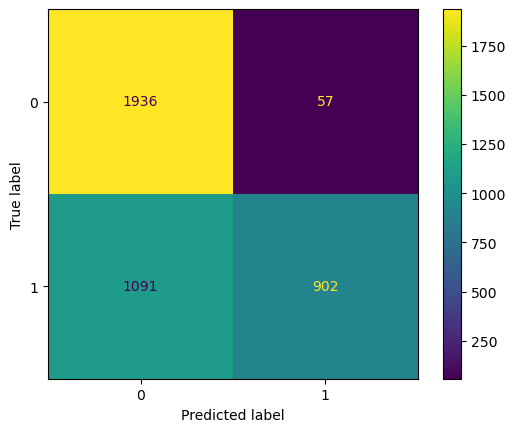

In [104]:
#build a confusion matrix and classification report
ConfusionMatrixDisplay.from_estimator( rf,X_train_resample, y_train_resample);


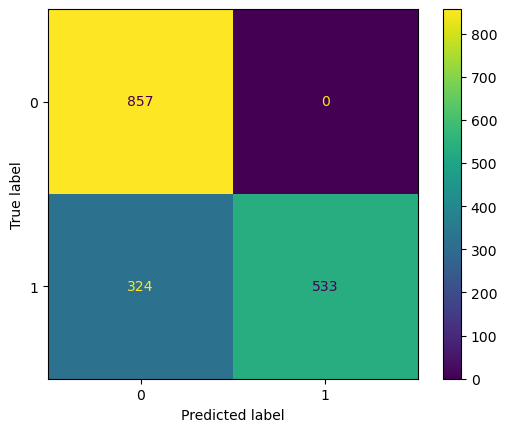

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test_resample,y_rf_pred)

In [109]:
rf_report=classification_report(y_test_resample,y_rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       857
           1       1.00      0.62      0.77       857

    accuracy                           0.81      1714
   macro avg       0.86      0.81      0.80      1714
weighted avg       0.86      0.81      0.80      1714

